# Data augmentation example

> CWT spectra data augmentation example.

In [ ]:
import pandas as pd
from pathlib import Path
import fastcore.all as fc

from fastai.data.all import *
from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ossl_source = '../../_data/ossl-tfm/ossl-tfm.csv'
# df = pd.read_csv(ossl_source); df.head()

In [ ]:
# df['kex'].min(), df['kex'].max() 

In [ ]:
im = Image.open('../../_data/ossl-tfm/im-bw/0a4a799aade039b885aaec0efa6d2d97.png')
im.mode

'RGBA'

202


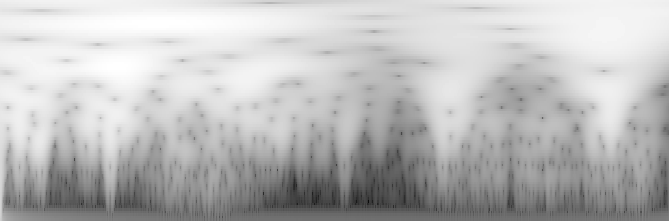

In [ ]:
im = Image.open('../../_data/test-0.png')
im_tensor = image2tensor(im)[0]
print(len(np.unique(im_tensor)))
im


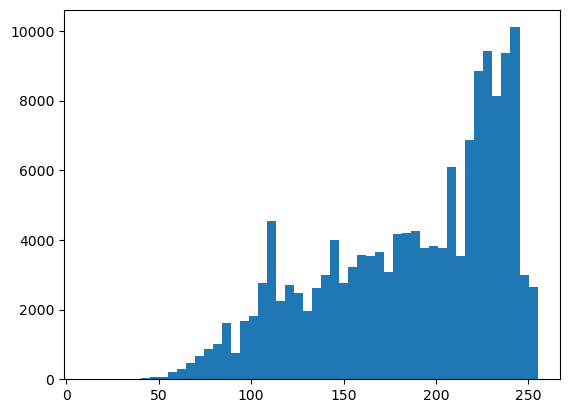

In [ ]:
plt.hist(im_tensor.flatten(), bins=50);

In [ ]:
im_array = np.array(im_rgba)

In [ ]:
percentiles = np.linspace(0, 99.9, 255)
len(percentiles)

255

In [ ]:
percentiles

array([ 0.        ,  0.39330709,  0.78661417,  1.17992126,  1.57322835,
        1.96653543,  2.35984252,  2.75314961,  3.14645669,  3.53976378,
        3.93307087,  4.32637795,  4.71968504,  5.11299213,  5.50629921,
        5.8996063 ,  6.29291339,  6.68622047,  7.07952756,  7.47283465,
        7.86614173,  8.25944882,  8.65275591,  9.04606299,  9.43937008,
        9.83267717, 10.22598425, 10.61929134, 11.01259843, 11.40590551,
       11.7992126 , 12.19251969, 12.58582677, 12.97913386, 13.37244094,
       13.76574803, 14.15905512, 14.5523622 , 14.94566929, 15.33897638,
       15.73228346, 16.12559055, 16.51889764, 16.91220472, 17.30551181,
       17.6988189 , 18.09212598, 18.48543307, 18.87874016, 19.27204724,
       19.66535433, 20.05866142, 20.4519685 , 20.84527559, 21.23858268,
       21.63188976, 22.02519685, 22.41850394, 22.81181102, 23.20511811,
       23.5984252 , 23.99173228, 24.38503937, 24.77834646, 25.17165354,
       25.56496063, 25.95826772, 26.3515748 , 26.74488189, 27.13

In [ ]:
np.unique(im_array)

array([ 83, 101, 105, 108, 110, 113, 114, 116, 118, 119, 121, 122, 123,
       124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255], dtype=uint8)

In [ ]:
im_rgba.size
im_rgba.getbands()
im_rgba.getcolors()
im_rgba.getbbox()
im_rgba.getdata()
im_rgba.getextrema()
im_rgba.getpalette()
im_rgba.getpixel()
im_rgba.getprojection()
im_rgba.getxmpmetadata()

In [ ]:
# Open the image
im_rgba = Image.open('../../_data/all-grey-255.png')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
@delegates()
class Quantize(DisplayedTransform):
    # split_idx,mode,mode_mask,order = None,BILINEAR,NEAREST,1
    "Quantize B&W image into `num_colors` colors."
    def __init__(self, 
        num_colors:int=10,
        **kwargs
    ):
        store_attr()
        super().__init__(**kwargs)

    def before_call(self, 
        b, 
        split_idx:int # Index of the train/valid dataset
    ):
        pass

    def encodes(self, x:Image.Image):
        # im_gray = x.convert('L')
        im_array = np.array(x)

        im_array = np.array(im_gray)
        percentiles = range(40, 99, 1)
        levels = np.percentile(im_array, percentiles)
        im_quant = np.digitize(im_array, levels)

        cmap = plt.get_cmap('Spectral_r')
        im_color = cmap(im_quant / (len(percentiles)))
        im_color_8bit = (im_color * 255).astype(np.uint8)
        return Image.fromarray(im_color_8bit)
    

In [ ]:
Quantize()(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=669x221>

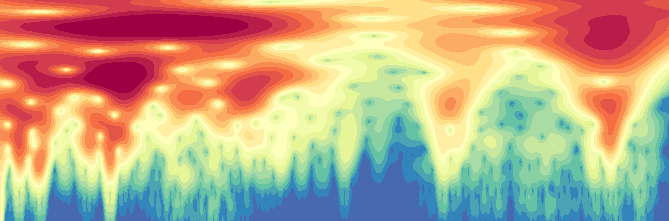

In [ ]:

# Convert to grayscale

im_array = np.array(im)

im_array = np.array(im_gray)
# percentiles = range(0.1, 99, 5)
percentiles= np.linspace(0.1, 99.9, 20)
levels = np.percentile(im_array, percentiles)
im_quant = np.digitize(im_array, levels)

cmap = plt.get_cmap('Spectral_r')
im_color = cmap(im_quant / (len(percentiles)))
im_color_8bit = (im_color * 255).astype(np.uint8)
im_final = Image.fromarray(im_color_8bit)
im_final


In [ ]:
im_tensor = image2tensor(im_gray)[0]
percentiles = torch.arange(40, 99, dtype=torch.float32)
levels = torch.quantile(im_tensor.float(), percentiles / 100)

# Digitize the image
im_quant = torch.bucketize(im_tensor.float(), levels)

In [ ]:
# Calculate percentiles
# percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# percentiles = [30, 50, 60, 70, 80, 90, 95, 97, 99]
# percentiles = range(40, 99, 1)
# percentiles = list(range(40, 80, 4)) + list(range(82, 99, 1))
# levels = np.percentile(im_array, percentiles)

In [ ]:
# Quantize the image
# im_quant = np.digitize(im_array, levels)


In [ ]:
# Create a colormap
cmap = plt.get_cmap('Spectral_r')

In [ ]:
# Apply colormap
im_color = cmap(im_quant / (len(percentiles)))

In [ ]:
type(im_color)

numpy.ndarray

In [ ]:
# Convert back to 8-bit color values
im_color_8bit = (im_color * 255).astype(np.uint8)

# im_color_8bit = (im_color * 255).round().to(torch.uint8)

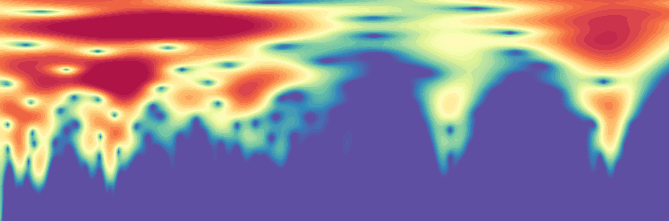

In [ ]:
# Create a new image
im_final = Image.fromarray(im_color_8bit)
im_final

In [ ]:
im_gray = im_rgba.convert('L')

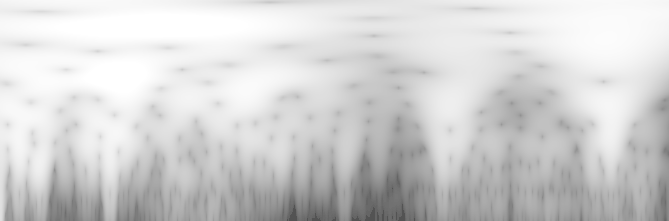

In [ ]:
im_gray

In [ ]:
im_array = np.array(im_gray)

In [ ]:
im_array

array([[244, 244, 244, ..., 246, 246, 246],
       [243, 243, 244, ..., 245, 245, 245],
       [242, 242, 243, ..., 245, 245, 244],
       ...,
       [223, 219, 210, ..., 116, 129, 137],
       [222, 219, 210, ..., 114, 128, 137],
       [222, 219, 209, ..., 113, 128, 136]], dtype=uint8)

In [ ]:
percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]
levels = np.percentile(im_array, percentiles)

In [ ]:
im_quant = np.digitize(im_array, levels)

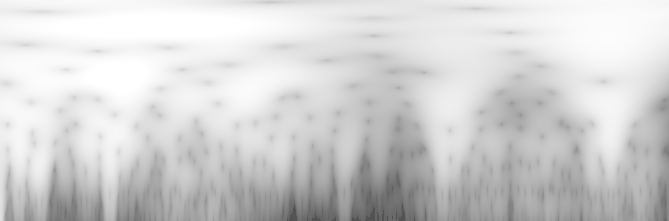

In [ ]:
im_rgb = im_rgba.convert('RGB'); im_rgb

In [ ]:
image2tensor(im_rgb)[0,:10, :10]

tensor([[244, 244, 244, 244, 245, 245, 245, 245, 245, 245],
        [243, 243, 244, 244, 244, 244, 244, 244, 244, 244],
        [242, 242, 243, 243, 243, 243, 243, 243, 243, 244],
        [242, 242, 242, 242, 242, 242, 242, 242, 243, 243],
        [241, 241, 241, 241, 242, 242, 242, 242, 242, 242],
        [240, 240, 241, 241, 241, 241, 241, 241, 241, 241],
        [239, 240, 240, 240, 240, 240, 240, 240, 240, 240],
        [239, 239, 239, 239, 239, 239, 239, 239, 239, 239],
        [238, 238, 238, 238, 238, 238, 238, 238, 238, 238],
        [238, 237, 237, 237, 237, 237, 237, 237, 237, 237]], dtype=torch.uint8)

In [ ]:
im_rgb.getcolors()

[(4869, (255, 255, 255)),
 (875, (253, 253, 253)),
 (2249, (251, 251, 251)),
 (2294, (249, 249, 249)),
 (2054, (247, 247, 247)),
 (2033, (245, 245, 245)),
 (1970, (243, 243, 243)),
 (1887, (241, 241, 241)),
 (2486, (239, 239, 239)),
 (2011, (237, 237, 237)),
 (2736, (235, 235, 235)),
 (2638, (233, 233, 233)),
 (1720, (231, 231, 231)),
 (1594, (229, 229, 229)),
 (1311, (227, 227, 227)),
 (1432, (225, 225, 225)),
 (1310, (223, 223, 223)),
 (1258, (221, 221, 221)),
 (1311, (219, 219, 219)),
 (1165, (217, 217, 217)),
 (1067, (215, 215, 215)),
 (1076, (213, 213, 213)),
 (1217, (211, 211, 211)),
 (573, (209, 209, 209)),
 (653, (207, 207, 207)),
 (632, (205, 205, 205)),
 (693, (203, 203, 203)),
 (762, (201, 201, 201)),
 (1469, (199, 199, 199)),
 (1513, (197, 197, 197)),
 (1513, (195, 195, 195)),
 (1483, (193, 193, 193)),
 (1371, (191, 191, 191)),
 (1328, (189, 189, 189)),
 (1272, (187, 187, 187)),
 (611, (185, 185, 185)),
 (553, (183, 183, 183)),
 (597, (181, 181, 181)),
 (619, (179, 179, 179

In [ ]:
image2tensor(im_rgba)[0,:,:].unique()

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  80,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 1

In [ ]:
image2tensor(im_rgba)[0,:,:]

tensor([[  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        ...,
        [  0,   0, 196,  ..., 116,  67,   0],
        [  0,   0, 205,  ..., 114,  72,   0],
        [  0,   5, 209,  ..., 113,  78,   0]], dtype=torch.uint8)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a tensor with values from 0 to 250
# For this example, let's create a sample tensor
tensor = torch.randint(0, 251, (100, 100))  # 100x100 tensor with random values 0-250


torch.Size([100, 100])

In [ ]:
tensor = image2tensor(im_rgba)[0,::]

In [ ]:
bins = np.linspace(0, 250, 20 + 1)
bins

array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
       112.5, 125. , 137.5, 150. , 162.5, 175. , 187.5, 200. , 212.5,
       225. , 237.5, 250. ])

In [ ]:


bins = [np.percentile(valid_tensor, p) for p in range(1, 99, 5)]
print(f'bins: {bins}')
num_colors = len(bins) - 1
print(f'num_colors: {num_colors}')

bins: [105.0, 145.0, 159.0, 168.0, 176.0, 183.0, 190.0, 196.0, 203.0, 210.0, 217.0, 222.0, 226.0, 230.0, 233.0, 236.0, 240.0, 244.0, 248.0, 253.0]
num_colors: 19


In [ ]:
mask = ~(tensor == 0)

In [ ]:
mask


tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False,  True,  ...,  True,  True, False],
        [False, False,  True,  ...,  True,  True, False],
        [False,  True,  True,  ...,  True,  True, False]])

In [ ]:
# To define bins an colors
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import BoundaryNorm

# Assuming tensor is your input tensor
tensor_im_rgba = image2tensor(im_rgba)[0,::]
# valid_tensor = tensor_im_rgba[mask]
bins = [np.percentile(tensor_im_rgba, p) for p in range(40, 99, 5)]
print(f'bins: {bins}')
num_colors = len(bins) - 1
print(f'num_colors: {num_colors}')
# num_colors = 12

# Create a color map object for 'jet' palette
cmap = plt.get_cmap('jet', num_colors)

# Create a norm to map values to colormap
norm = BoundaryNorm(bins, cmap.N)


bins: [193.0, 200.0, 208.0, 216.0, 222.0, 227.0, 231.0, 234.0, 238.0, 242.0, 246.0, 251.0]
num_colors: 11


In [ ]:

# # Convert to 8-bit color values
# colored_array_8bit = (colored_array * 255).astype(np.uint8)

# # set mask to black (to be adapted below)
# colored_array[~mask] = [0, 0, 0, alpha[~mask]]

# Create a PIL Image
# img = Image.fromarray(colored_array_8bit)
# img

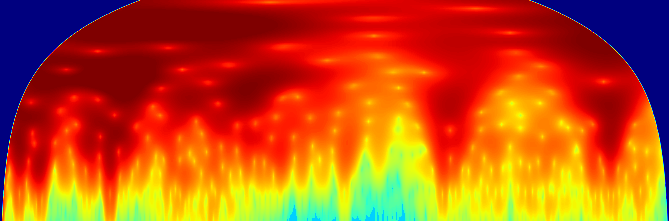

In [ ]:
tensor = image2tensor(im_rgba)[0,::]
# Create a color map object for 'jet' palette
cmap = plt.get_cmap('jet')

# Normalize the tensor values to be between 0 and 1
normalized_tensor = tensor.float() / 250

# Convert the tensor to a numpy array
np_array = normalized_tensor.numpy()

# Apply the colormap
colored_array = cmap(np_array)

# Convert to 8-bit color values
colored_array_8bit = (colored_array * 255).astype(np.uint8)

# Create a PIL Image
img = Image.fromarray(colored_array_8bit)
img

In [ ]:
len(image2tensor(im_rgba).unique())

250

In [ ]:
im_rgb = im_rgba.convert('RGB')

In [ ]:
image2tensor(im_rgb)[0,:10,:10]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [ ]:
im_rgb.getcolors()


[(4558, (255, 255, 255)),
 (704, (253, 253, 253)),
 (1065, (251, 251, 251)),
 (1184, (249, 249, 249)),
 (1226, (247, 247, 247)),
 (1502, (245, 245, 245)),
 (1607, (243, 243, 243)),
 (1622, (241, 241, 241)),
 (2133, (239, 239, 239)),
 (1822, (237, 237, 237)),
 (2530, (235, 235, 235)),
 (2482, (233, 233, 233)),
 (1641, (231, 231, 231)),
 (1507, (229, 229, 229)),
 (1242, (227, 227, 227)),
 (1371, (225, 225, 225)),
 (1247, (223, 223, 223)),
 (1211, (221, 221, 221)),
 (1263, (219, 219, 219)),
 (1131, (217, 217, 217)),
 (1030, (215, 215, 215)),
 (1047, (213, 213, 213)),
 (1180, (211, 211, 211)),
 (558, (209, 209, 209)),
 (646, (207, 207, 207)),
 (620, (205, 205, 205)),
 (686, (203, 203, 203)),
 (753, (201, 201, 201)),
 (1452, (199, 199, 199)),
 (1499, (197, 197, 197)),
 (1495, (195, 195, 195)),
 (1475, (193, 193, 193)),
 (1361, (191, 191, 191)),
 (1315, (189, 189, 189)),
 (1263, (187, 187, 187)),
 (608, (185, 185, 185)),
 (551, (183, 183, 183)),
 (586, (181, 181, 181)),
 (608, (179, 179, 179

In [ ]:
im_rgb.size

(669, 221)

In [ ]:
?im_rgb.quantize


Signature:
im_rgb.quantize(
    colors: 'int' = 256,
    method: 'int | None' = None,
    kmeans: 'int' = 0,
    palette=None,
    dither: 'Dither' = <Dither.FLOYDSTEINBERG: 3>,
) -> 'Image'
Docstring:
Convert the image to 'P' mode with the specified number
of colors.

:param colors: The desired number of colors, <= 256
:param method: :data:`Quantize.MEDIANCUT` (median cut),
               :data:`Quantize.MAXCOVERAGE` (maximum coverage),
               :data:`Quantize.FASTOCTREE` (fast octree),
               :data:`Quantize.LIBIMAGEQUANT` (libimagequant; check support
               using :py:func:`PIL.features.check_feature` with
               ``feature="libimagequant"``).

               By default, :data:`Quantize.MEDIANCUT` will be used.

               The exception to this is RGBA images. :data:`Quantize.MEDIANCUT`
               and :data:`Quantize.MAXCOVERAGE` do not support RGBA images, so
               :data:`Quantize.FASTOCTREE` is used by default instead.
:param kmeans: 

In [ ]:
im_p = im_rgb.quantize(colors=256, method=Image.MEDIANCUT)

In [ ]:
image2tensor(im_p)[0,:10,:10]


tensor([[249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249],
        [249, 249, 249, 249, 249, 249, 249, 249, 249, 249]], dtype=torch.uint8)

In [ ]:
image2tensor(im_p).unique()

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [ ]:
?im_p.getpalette

Signature: im_p.getpalette(rawmode: 'str | None' = 'RGB') -> 'list[int] | None'
Docstring:
Returns the image palette as a list.

:param rawmode: The mode in which to return the palette. ``None`` will
   return the palette in its current mode.

   .. versionadded:: 9.1.0

:returns: A list of color values [r, g, b, ...], or None if the
   image has no palette.
File:      ~/mambaforge/envs/uhina/lib/python3.12/site-packages/PIL/Image.py
Type:      method

In [ ]:
im_p.getpalette()

[255,
 255,
 255,
 254,
 254,
 254,
 253,
 253,
 253,
 252,
 252,
 252,
 251,
 251,
 251,
 250,
 250,
 250,
 249,
 249,
 249,
 248,
 248,
 248,
 247,
 247,
 247,
 246,
 246,
 246,
 245,
 245,
 245,
 244,
 244,
 244,
 243,
 243,
 243,
 242,
 242,
 242,
 241,
 241,
 241,
 240,
 240,
 240,
 239,
 239,
 239,
 238,
 238,
 238,
 237,
 237,
 237,
 236,
 236,
 236,
 235,
 235,
 235,
 234,
 234,
 234,
 233,
 233,
 233,
 232,
 232,
 232,
 231,
 231,
 231,
 230,
 230,
 230,
 229,
 229,
 229,
 228,
 228,
 228,
 227,
 227,
 227,
 226,
 226,
 226,
 225,
 225,
 225,
 224,
 224,
 224,
 223,
 223,
 223,
 222,
 222,
 222,
 221,
 221,
 221,
 220,
 220,
 220,
 219,
 219,
 219,
 218,
 218,
 218,
 217,
 217,
 217,
 216,
 216,
 216,
 215,
 215,
 215,
 214,
 214,
 214,
 213,
 213,
 213,
 212,
 212,
 212,
 211,
 211,
 211,
 210,
 210,
 210,
 209,
 209,
 209,
 208,
 208,
 208,
 207,
 207,
 207,
 206,
 206,
 206,
 205,
 205,
 205,
 204,
 204,
 204,
 203,
 203,
 203,
 202,
 202,
 202,
 201,
 201,
 201,
 200,
 200

In [ ]:
?im_p.getcolors

Signature: im_p.getcolors(maxcolors: 'int' = 256)
Docstring:
Returns a list of colors used in this image.

The colors will be in the image's mode. For example, an RGB image will
return a tuple of (red, green, blue) color values, and a P image will
return the index of the color in the palette.

:param maxcolors: Maximum number of colors.  If this number is
   exceeded, this method returns None.  The default limit is
   256 colors.
:returns: An unsorted list of (count, pixel) values.
File:      ~/mambaforge/envs/uhina/lib/python3.12/site-packages/PIL/Image.py
Type:      method

In [ ]:
# list of (count, pixel) values
im_p.getcolors()

[(4558, 0),
 (518, 1),
 (704, 2),
 (874, 3),
 (1065, 4),
 (1651, 5),
 (1184, 6),
 (1640, 7),
 (1226, 8),
 (1786, 9),
 (1502, 10),
 (2128, 11),
 (1607, 12),
 (2154, 13),
 (1622, 14),
 (1668, 15),
 (2133, 16),
 (1804, 17),
 (1822, 18),
 (2377, 19),
 (2530, 20),
 (1688, 21),
 (2482, 22),
 (2379, 23),
 (1641, 24),
 (2548, 25),
 (1507, 26),
 (2014, 27),
 (1242, 28),
 (2066, 29),
 (1371, 30),
 (1298, 31),
 (1247, 32),
 (1983, 33),
 (1211, 34),
 (1325, 35),
 (1263, 36),
 (1238, 37),
 (1131, 38),
 (576, 39),
 (1030, 40),
 (1058, 41),
 (1047, 42),
 (520, 43),
 (1180, 44),
 (1107, 45),
 (558, 46),
 (1232, 47),
 (646, 48),
 (1223, 49),
 (620, 50),
 (1279, 51),
 (686, 52),
 (1334, 53),
 (753, 54),
 (829, 55),
 (1452, 56),
 (711, 57),
 (1499, 58),
 (739, 59),
 (1495, 60),
 (647, 61),
 (1475, 62),
 (722, 63),
 (1361, 64),
 (671, 65),
 (1315, 66),
 (650, 67),
 (1263, 68),
 (1232, 69),
 (608, 70),
 (1165, 71),
 (551, 72),
 (1217, 73),
 (586, 74),
 (1193, 75),
 (608, 76),
 (1120, 77),
 (570, 78),
 (114

Level 0: RGB = [0.  0.  0.5]
Level 1: RGB = [0.         0.         0.73172906]
Level 2: RGB = [0.         0.         0.96345811]
Level 3: RGB = [0.         0.12745098 1.        ]
Level 4: RGB = [0.         0.33137255 1.        ]
Level 5: RGB = [0.         0.55098039 1.        ]
Level 6: RGB = [0.         0.75490196 1.        ]
Level 7: RGB = [0.06008855 0.9745098  0.90765338]
Level 8: RGB = [0.22454143 1.         0.74320051]
Level 9: RGB = [0.40164453 1.         0.56609741]
Level 10: RGB = [0.56609741 1.         0.40164453]
Level 11: RGB = [0.74320051 1.         0.22454143]
Level 12: RGB = [0.90765338 1.         0.06008855]
Level 13: RGB = [1.         0.82861293 0.        ]
Level 14: RGB = [1.         0.63979666 0.        ]
Level 15: RGB = [1.         0.43645606 0.        ]
Level 16: RGB = [1.        0.2476398 0.       ]
Level 17: RGB = [0.96345811 0.0442992  0.        ]
Level 18: RGB = [0.73172906 0.         0.        ]
Level 19: RGB = [0.5 0.  0. ]


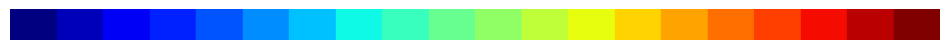

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Specify the colormap and the number of levels
cmap_name = 'jet'
num_levels = 20

# Create a colormap object
cmap = cm.get_cmap(cmap_name)

# Generate evenly spaced values between 0 and 1
values = np.linspace(0, 1, num_levels)

# Get the colors for each level
colors = cmap(values)

# Print the RGB values (excluding alpha)
for i, color in enumerate(colors):
    print(f"Level {i}: RGB = {color[:3]}")

# Optionally, visualize the colors
fig, ax = plt.subplots(figsize=(12, 0.4))
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, num_levels)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

In [ ]:
im_p.getpalette()

[255,
 255,
 255,
 254,
 254,
 254,
 253,
 253,
 253,
 252,
 252,
 252,
 251,
 251,
 251,
 250,
 250,
 250,
 249,
 249,
 249,
 248,
 248,
 248,
 247,
 247,
 247,
 246,
 246,
 246,
 245,
 245,
 245,
 244,
 244,
 244,
 243,
 243,
 243,
 242,
 242,
 242,
 241,
 241,
 241,
 240,
 240,
 240,
 239,
 239,
 239,
 238,
 238,
 238,
 237,
 237,
 237,
 236,
 236,
 236,
 235,
 235,
 235,
 234,
 234,
 234,
 233,
 233,
 233,
 232,
 232,
 232,
 231,
 231,
 231,
 230,
 230,
 230,
 229,
 229,
 229,
 228,
 228,
 228,
 227,
 227,
 227,
 226,
 226,
 226,
 225,
 225,
 225,
 224,
 224,
 224,
 223,
 223,
 223,
 222,
 222,
 222,
 221,
 221,
 221,
 220,
 220,
 220,
 219,
 219,
 219,
 218,
 218,
 218,
 217,
 217,
 217,
 216,
 216,
 216,
 215,
 215,
 215,
 214,
 214,
 214,
 213,
 213,
 213,
 212,
 212,
 212,
 211,
 211,
 211,
 210,
 210,
 210,
 209,
 209,
 209,
 208,
 208,
 208,
 207,
 207,
 207,
 206,
 206,
 206,
 205,
 205,
 205,
 204,
 204,
 204,
 203,
 203,
 203,
 202,
 202,
 202,
 201,
 201,
 201,
 200,
 200

In [ ]:
im_p.getcolors()

[(4558, 0),
 (518, 1),
 (704, 2),
 (874, 3),
 (1065, 4),
 (1651, 5),
 (1184, 6),
 (1640, 7),
 (1226, 8),
 (1786, 9),
 (1502, 10),
 (2128, 11),
 (1607, 12),
 (2154, 13),
 (1622, 14),
 (1668, 15),
 (2133, 16),
 (1804, 17),
 (1822, 18),
 (2377, 19),
 (2530, 20),
 (1688, 21),
 (2482, 22),
 (2379, 23),
 (1641, 24),
 (2548, 25),
 (1507, 26),
 (2014, 27),
 (1242, 28),
 (2066, 29),
 (1371, 30),
 (1298, 31),
 (1247, 32),
 (1983, 33),
 (1211, 34),
 (1325, 35),
 (1263, 36),
 (1238, 37),
 (1131, 38),
 (576, 39),
 (1030, 40),
 (1058, 41),
 (1047, 42),
 (520, 43),
 (1180, 44),
 (1107, 45),
 (558, 46),
 (1232, 47),
 (646, 48),
 (1223, 49),
 (620, 50),
 (1279, 51),
 (686, 52),
 (1334, 53),
 (753, 54),
 (829, 55),
 (1452, 56),
 (711, 57),
 (1499, 58),
 (739, 59),
 (1495, 60),
 (647, 61),
 (1475, 62),
 (722, 63),
 (1361, 64),
 (671, 65),
 (1315, 66),
 (650, 67),
 (1263, 68),
 (1232, 69),
 (608, 70),
 (1165, 71),
 (551, 72),
 (1217, 73),
 (586, 74),
 (1193, 75),
 (608, 76),
 (1120, 77),
 (570, 78),
 (114

In [ ]:

num_colors = len(im_p.getcolors())
print(f"Number of unique colors: {num_colors}")

im_p

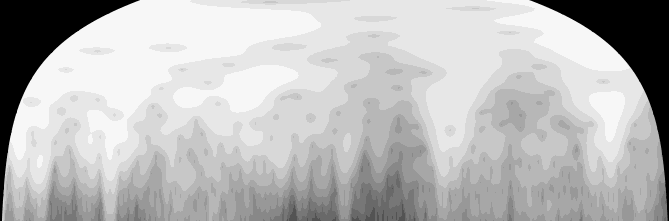

In [ ]:
im_p = im.convert('P', palette=Image.ADAPTIVE, colors=256)
im_p

In [ ]:
num_colors = len(image2tensor(im_p).unique())
print(f"Number of unique colors: {num_colors}")

Number of unique colors: 16


In [ ]:
np.unique(np.array(im_p.getpalette()))

array([  0,  23,  38,  55,  72,  83, 105, 119, 136, 152, 167, 183, 199,
       216, 231, 247])

In [ ]:
image2tensor(im_p).unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=torch.uint8)

In [ ]:

im_p.putpalette(im_p.getpalette())
im_p.show()
# P: Palette mode = indexed color images

In [ ]:
# P: Palette mode = indexed color images
# Example:

from PIL import Image

# Create a new image with "P" mode
image = Image.new("P", (100, 100))  # Creates a 100x100 pixel image

# Get the palette
palette = image.getpalette()

In [ ]:
palette

[]

In [ ]:

# Modify the palette (optional)
new_palette = [0, 0, 0, 255, 255, 255]  # Black and white palette
image.putpalette(new_palette)

# Set some pixels
image.putpixel((10, 10), 1)  # Set the pixel at (10, 10) to white
image.putpixel((20, 20), 0)  # Set the pixel at (20, 20) to black

# Save the image
# image.save("example.png")


In [ ]:
# Define a custom color palette (example with 6 colors)
palette = [
    0, 0, 0,      # Black
    255, 0, 0,    # Red
    255, 255, 0,  # Yellow
    0, 255, 0,    # Green
    0, 0, 255,    # Blue
    255, 0, 255   # Magenta
]

# Create a new image with the palette
palette_im = Image.new('P', (1, 1))
palette_im.putpalette(palette)

# Quantize the image and apply the palette
quantized_im = im.quantize(colors=6, palette=palette_im, dither=Image.FLOYDSTEINBERG)

# Display the result
quantized_im.show()

ValueError: only RGB or L mode images can be quantized to a palette

In [ ]:
# how to get the cmap of maplotlip

SyntaxError: incomplete input (785122778.py, line 1)

In [ ]:
from PIL import Image
import numpy as np

# Open the grey image
im = Image.open('../../_data/all-grey-255.png')

# Convert to numpy array
im_array = np.array(im)

# Define color mapping function
def map_grey_to_color(grey_value):
    if grey_value < 50:
        return [0, 0, 0]  # Black for very dark greys
    elif grey_value < 100:
        return [255, 0, 0]  # Red for dark greys
    elif grey_value < 150:
        return [255, 255, 0]  # Yellow for medium greys
    elif grey_value < 200:
        return [0, 255, 0]  # Green for light greys
    else:
        return [0, 0, 255]  # Blue for very light greys

# Apply the color mapping
colored_array = np.apply_along_axis(map_grey_to_color, 2, im_array)

# Convert back to PIL Image
colored_im = Image.fromarray(colored_array.astype('uint8'), 'RGB')

# Display the result
colored_im.show()

# If you want to save the result
# colored_im.save('custom_colored_image.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
def map_grey_to_color(pixel):
    grey_value = pixel[0]  # Assuming R, G, and B are the same in a grey image
    if grey_value < 50:
        return [0, 0, 0, pixel[3]]  # Black for very dark greys
    elif grey_value < 100:
        return [255, 0, 0, pixel[3]]  # Red for dark greys
    elif grey_value < 150:
        return [255, 255, 0, pixel[3]]  # Yellow for medium greys
    elif grey_value < 200:
        return [0, 255, 0, pixel[3]]  # Green for light greys
    else:
        return [0, 0, 255, pixel[3]]  # Blue for very light greys

# Make sure to use 'RGBA' mode when creating the final image
colored_im = Image.fromarray(colored_array.astype('uint8'), 'RGBA')

Level 0: RGB = [0.  0.  0.5]
Level 1: RGB = [0.         0.         0.99910873]
Level 2: RGB = [0.         0.37843137 1.        ]
Level 3: RGB = [0.         0.83333333 1.        ]
Level 4: RGB = [0.30044276 1.         0.66729918]
Level 5: RGB = [0.66729918 1.         0.30044276]
Level 6: RGB = [1.         0.90123457 0.        ]
Level 7: RGB = [1.         0.48002905 0.        ]
Level 8: RGB = [0.99910873 0.07334786 0.        ]
Level 9: RGB = [0.5 0.  0. ]


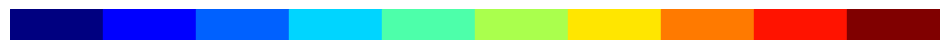

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Specify the colormap and the number of levels
cmap_name = 'jet'
num_levels = 10

# Create a colormap object
cmap = cm.get_cmap(cmap_name)

# Generate evenly spaced values between 0 and 1
values = np.linspace(0, 1, num_levels)

# Get the colors for each level
colors = cmap(values)

# Print the RGB values (excluding alpha)
for i, color in enumerate(colors):
    print(f"Level {i}: RGB = {color[:3]}")

# Optionally, visualize the colors
fig, ax = plt.subplots(figsize=(12, 0.4))
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, num_levels)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

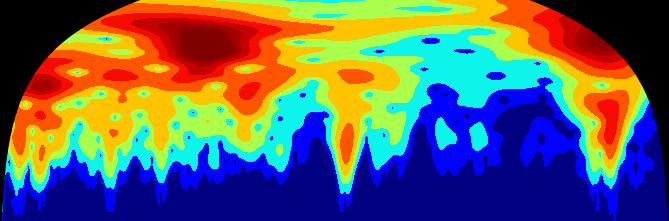

In [ ]:
im = Image.open('../../_data/ossl-tfm/img/0a0a0c647671fd3030cc13ba5432eb88.png')
im

In [ ]:
im_simple = im.convert('P', palette=Image.ADAPTIVE, colors=10)
im_simple_tensor = image2tensor(im_simple)
print(im_simple_tensor.unique())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.uint8)


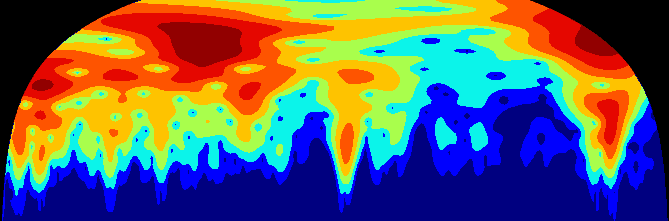

In [ ]:
im_simple

In [ ]:
?im.quantize

Signature:
im.quantize(
    colors: 'int' = 256,
    method: 'int | None' = None,
    kmeans: 'int' = 0,
    palette=None,
    dither: 'Dither' = <Dither.FLOYDSTEINBERG: 3>,
) -> 'Image'
Docstring:
Convert the image to 'P' mode with the specified number
of colors.

:param colors: The desired number of colors, <= 256
:param method: :data:`Quantize.MEDIANCUT` (median cut),
               :data:`Quantize.MAXCOVERAGE` (maximum coverage),
               :data:`Quantize.FASTOCTREE` (fast octree),
               :data:`Quantize.LIBIMAGEQUANT` (libimagequant; check support
               using :py:func:`PIL.features.check_feature` with
               ``feature="libimagequant"``).

               By default, :data:`Quantize.MEDIANCUT` will be used.

               The exception to this is RGBA images. :data:`Quantize.MEDIANCUT`
               and :data:`Quantize.MAXCOVERAGE` do not support RGBA images, so
               :data:`Quantize.FASTOCTREE` is used by default instead.
:param kmeans: Inte

In [ ]:
im_quantized = im.quantize(colors=10)
im_quantized_tensor = image2tensor(im_quantized)
print(im_quantized_tensor.unique())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.uint8)


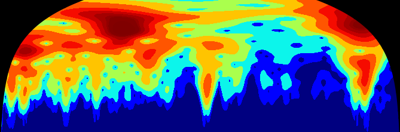

In [ ]:
im.to_thumb(400)

In [ ]:
im_tensor = image2tensor(im); im_tensor.shape

torch.Size([4, 221, 669])

In [ ]:
im_tensor.max(), im_tensor.min()

(tensor(255, dtype=torch.uint8), tensor(0, dtype=torch.uint8))

In [ ]:
im_tensor[0,300:310, 100:110]

tensor([], size=(0, 10), dtype=torch.uint8)

In [ ]:
image2tensor(im.convert('L')).unique()



tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  56,  57,
         58,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  88,
         89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 111, 112, 113, 115, 116, 117, 119, 121,
        122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 139, 141, 143, 146,
        148, 150, 154, 155, 156, 157, 158, 159, 160, 162, 164, 165, 168, 169,
        170, 172, 174, 175, 178, 179, 180, 181, 182, 184, 187, 189, 190, 191,
        199, 200, 207, 209], dtype=torch.uint8)

In [ ]:
im.getpalette()

In [ ]:
c = 0
im_tensor[c,:,:].min(), im_tensor[c,:,:].max(), im_tensor[c,:,:].unique()

(tensor(0, dtype=torch.uint8),
 tensor(255, dtype=torch.uint8),
 tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  28,  29,
          30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
          59,  60,  61,  63,  64,  65,  66,  67,  69,  71,  73,  74,  75,  76,
          78,  79,  81,  82,  83,  85,  86,  89,  90,  92,  93,  94,  95,  98,
          99, 100, 101, 103, 104, 105, 106, 107, 108, 110, 112, 114, 115, 116,
         119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 137, 138, 139, 140, 142, 144, 145, 146, 148, 149, 150, 151, 153,
         154, 155, 156, 157, 159, 161, 162, 163, 164, 166, 167, 168, 169, 170,
         172, 173, 175, 176, 177, 179, 181, 187, 188, 189, 190, 191, 192, 193,
         194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206

In [ ]:
im_tensor[3,100:105,100:105]

tensor([[255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255]], dtype=torch.uint8)

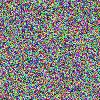

In [ ]:
to_image(torch.randn((3, 100, 100)))

In [ ]:
# ossl_source = '../../_data/ossl-tfm/ossl-tfm.csv'
# df = pd.read_csv(ossl_source); df.head()

# ossl = DataBlock(blocks=(ImageBlock, RegressionBlock),
#                 get_x=ColReader(0, pref='../../_data/ossl-tfm/img/'),
#                 get_y=ColReader(1),
#                 batch_tfms=Normalize.from_stats(*imagenet_stats),
#                 item_tfms=RatioResize(224),
#                 splitter=RandomSplitter(valid_pct=0.1, seed=41)
                
# dls = ossl.dataloaders(df)

# learn = vision_learner(dls, resnet18, pretrained=False, metrics=R2Score())
# learn.fit_one_cycle(20, 2e-3)

In [ ]:
ossl = DataBlock(blocks=(ImageBlock, RegressionBlock),
                get_x=ColReader(0, pref='../../_data/ossl-tfm/img/'),
                get_y=ColReader(1),
                batch_tfms=Normalize.from_stats(*imagenet_stats),
                item_tfms=RatioResize(224),
                splitter=RandomSplitter(valid_pct=0.1, seed=41)
#    batch_tfms=aug_transforms()
)

In [ ]:
dls = ossl.dataloaders(df)

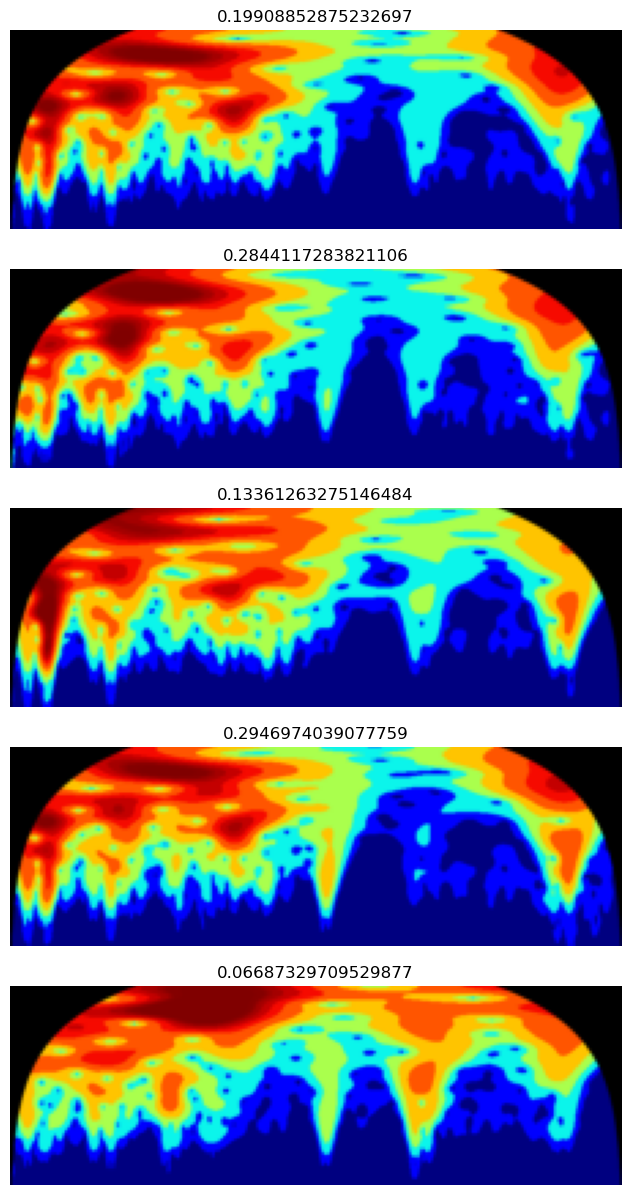

In [ ]:
dls.show_batch(nrows=5, ncols=1, figsize=(10, 15))

In [ ]:
learn = vision_learner(dls, resnet18, pretrained=False, metrics=R2Score())

SuggestedLRs(valley=0.00363078061491251)

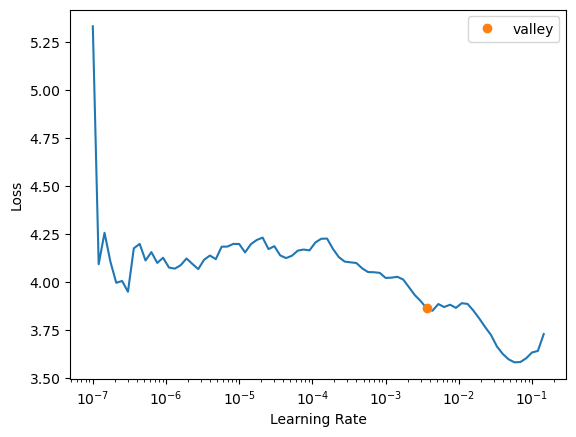

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, 2e-3)

epoch,train_loss,valid_loss,r2_score,time
0,1.010429,0.160208,-0.149856,07:33
1,0.101805,0.105252,0.244579,07:37
2,0.080996,0.092230,0.338037,07:45
3,0.061543,0.068272,0.509990,07:48
4,0.061344,0.045711,0.671919,07:57
5,0.055588,0.044312,0.681960,08:00
6,0.047412,0.038732,0.722007,08:06
7,0.042374,0.045522,0.673274,08:08
8,0.037796,0.034118,0.755128,08:07
9,0.030448,0.033509,0.759500,08:13


## Experiments:


Color scale: `viridis` | Discretization: `percentiles = [i for i in range(60, 100)]`

| Model     | Image Size | Learning Rate | Epochs | R2 Score | Time per Epoch | Finetuning | with axis ticks |
|-----------|------------|----------------|--------|----------|----------------|------------|----------------|
| ResNet-18 | 100        | 1e-3           | 10     | 0.648    | 05:12          | No        | Yes             |
| ResNet-18 | 224        | 2e-3           | 10     | 0.69     | 07:30          | No        | Yes             |
| ResNet-18 | 750 (original size)        |    1e-3        | 10     | 0.71          | 36:00          | No         | Yes             |
| ResNet-18 | 224        | 2e-3           | 20     |   0.704   | 07:30          | No        | Yes             |
| ResNet-18 | 224        | 2e-3           | 10     |   0.71   | 07:00          | No        | No             |
    

Discretization: `percentiles = [i for i in range(20, 100)]`

| Model     | Image Size | Learning Rate | Epochs | R2 Score | Time per Epoch | Finetuning | with axis ticks | colour scale |
|-----------|------------|---------------|--------|----------|----------------|------------|-----------------|--------------|
| ResNet-18 | 224        | 2e-3          | 10     | 0.7      | 05:12          | No         | No              | `viridis`    |
| ResNet-18 | 224        | 3e-3          | 10     | 0.71      | 05:12          | No         | No              | `jet`        |

From now on `with axis ticks` is always `No`.

Discretization: esimated on `10000` cwt power percentiles `[20, 30, 40, 50, 60, 70, 80, 90, 95, 97, 99]`

| Model     | Image Size | Learning Rate | Epochs | R2 Score | Time per Epoch | Finetuning | remark | colour scale |
|-----------|------------|---------------|--------|----------|----------------|------------|-----------------|--------------|
| ResNet-18 | 224        | 2e-3          | 10     | 0.71      | 05:12          | No         | None              | `jet`    |
| ResNet-18 | 224        | 2e-3         | 10     | 0.685      | 05:12          | No         | y range added              | `jet`    |


From now on random splitter with `10%` validation and random seed `41`.

Discretization: esimated on `10000` cwt power percentiles `[20, 30, 40, 50, 60, 70, 80, 90, 95, 97, 99]`

| Model     | Image Size | Learning Rate | Epochs | R2 Score | Time per Epoch | Finetuning | remark | colour scale |
|-----------|------------|---------------|--------|----------|----------------|------------|-----------------|--------------|
| ResNet-18 | 224        | 2e-3          | 10     | 0.7      | 05:12          | No         | Pre-train & normalize: True              | `jet`    |
| ResNet-18 | 224        | 2e-3          | 10     | 0.796     | 08:12          | No         | No Pre-train              | `jet`    |
| ResNet-18 | 224        | 3e-3          | 10     | 0.7     | 05:12          | No         | Pre-train & normalize: False            | `jet`    |
| ResNet-18 | 224        | 2e-3          | 20     | **0.829**     | 08:12          | No         | No Pre-train (try 18 epochs)              | `jet`    |
